In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from glob import glob

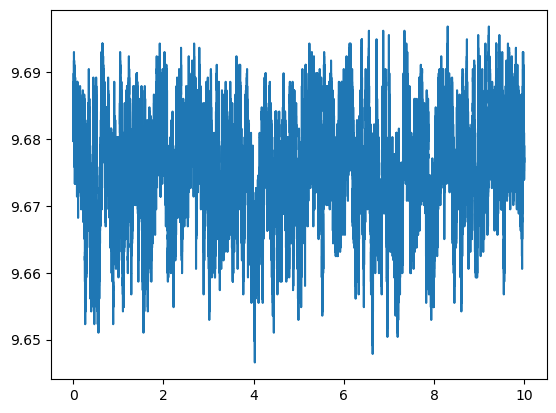

In [13]:
file_path = "./Data/Sum.csv"  # Replace with your file path
df = pd.read_csv(file_path)
plt.plot(df.iloc[:, 0], df.iloc[:, 1]+10)


In [14]:
def process_and_plot_psd(file_path, sampling_rate):
    # Load data
    data = pd.read_csv(file_path, header=None).squeeze()
    
    # Ensure data is a 1D array
    signal = data.values if isinstance(data, pd.Series) else data.iloc[:, 0].values
    n = len(signal)

    # Apply FFT
    fft_vals = np.fft.fft(signal)
    freqs = np.fft.fftfreq(n, d=1/sampling_rate)

    # Take only positive frequencies
    positive_freqs = freqs[:n // 2]
    psd = np.abs(fft_vals[:n // 2]) ** 2

    # Plot
    plt.figure(figsize=(10, 6))
    plt.loglog(positive_freqs, psd, label=file_path)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Power Spectral Density")
    plt.title("PSD of Signal")
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.tight_layout()
    plt.show()

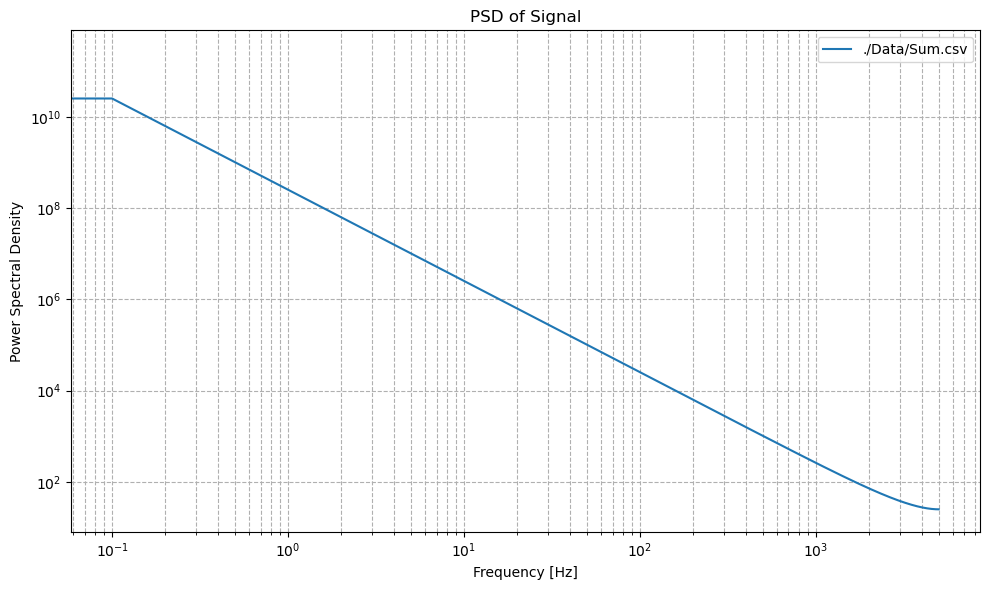

In [15]:
file_path = "./Data/Sum.csv"  # Replace with your file path
sampling_rate = 10000  # Set this to your actual sampling rate in Hz
process_and_plot_psd(file_path, sampling_rate)
